 ## Poisson Regression (Compare With aircraftdamage.odc from March28 folder)

This well known data set was featured in Montgomery et al. (2006)
and Ntzoufras (2009).
The variable of interest to model is the count of aircraft damages
on data consisting of 30 strike missions during the Vietnam war.
 
The data set is a matrix with 4 columns and 30 rows
 
Column 1  damage -- The number of damaged locations on the aircraft
Column 2  type      -- Binary variable (0 for A4 and 1 for A6)
Column 3  bombload -- The aitrcraft bombload in tons
Column 4  airexp -- The total months of aircrew experience
 
Fit Poisson regression for response damage with covariates
type, bombload, and airexp.

In [3]:
import pymc3 as pm
import pandas as pd
import matplotlib.pyplot as plt
import datetime

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [19]:
# Data from aircraftdamage
ac_data = pd.DataFrame({'damage':[0,1,0,0,0,0,1,0,0,2,1,1,1,1,2,3,1,1,1,2,0,1,1,2,5,1,1,5,5,7],
                        'type':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
                        'bombload':[4,4,4,5,5,5,6,6,6,7,7,7,8,8,8,7,7,7,10,10,10,12,12,12,8,8,8,14,14,14],
                        'airexp':[91.5,84,76.5,69,61.5,80,72.5,65,57.5,50,103,95.5,88,80.5,73,116.1,100.6,85,69.4,53.9,112.3,96.7,81.1,65.6,50,120,104.4,88.9,73.7,57.8]})
#ac_data_prediction = pd.DataFrame({'type':[1,2],'bombload':[9,9],'airexp':[100.0,100.0]})

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


Time before starting sampling 2018-04-22 20:22:59


Sequential sampling (1 chains in 1 job)
NUTS: [b3, b2, b1, b0]
100%|██████████| 3300/3300 [00:27<00:00, 118.98it/s]
The acceptance probability does not match the target. It is 0.9682744394080885, but should be close to 0.8. Try to increase the number of tuning steps.
Only one chain was sampled, this makes it impossible to run some convergence checks


Time after starting sampling 2018-04-22 20:23:28


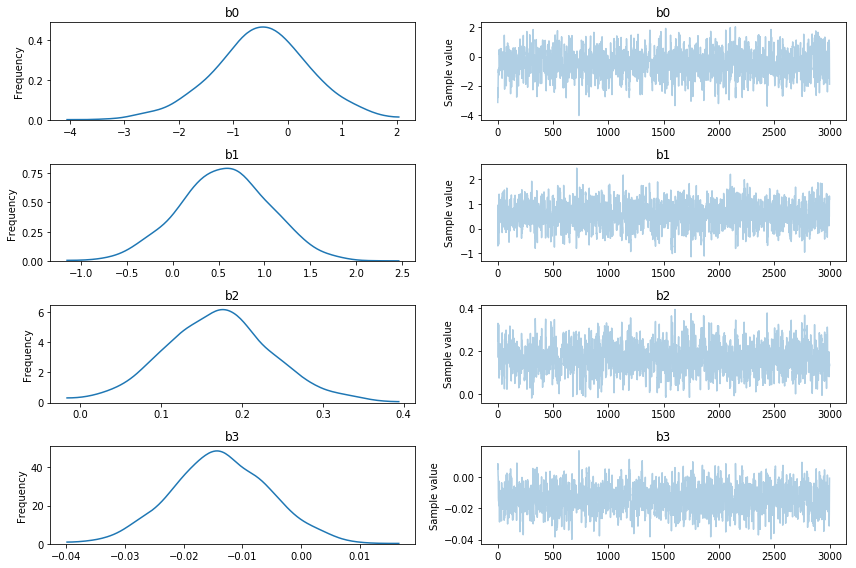

,mean,sd,mc_error,hpd_2.5,hpd_97.5
b0,-0.480982,0.881086,0.025497,-2.150389,1.365343
b1,0.562632,0.490884,0.015394,-0.401691,1.500064
b2,0.170521,0.066762,0.002276,0.028021,0.297208
b3,-0.013737,0.008293,0.000215,-0.029971,0.002684


In [24]:
with pm.Model() as model:
    # Non-informative Normal priors for parameters
    b0 = pm.Normal('b0',0,1000)
    b1 = pm.Normal('b1',0,1000)
    b2 = pm.Normal('b2',0,1000)
    b3 = pm.Normal('b3',0,1000)
    
    # Define likelihood
    
    likelihood = pm.Poisson('damage',
                              pm.math.exp(b0+b1*ac_data.type+b2*ac_data.bombload+b3*ac_data.airexp),
                             observed=ac_data.damage)
    
    # Inference
    print('Time before starting sampling',datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'))
    trace = pm.sample(3000, chains=1, tune=300)
#    trace = pm.sample(10000)
    print('Time after starting sampling',datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'))
    
pm.traceplot(trace)
plt.show()
pm.summary(trace)

The coeffiecients b0, b1, b2, b3 match the estimates from aircraftdamage.odc